# Logistic Map - PyTorch implementation

### $X_{n+1} = r X_{n}(1-X_{n})$

where $r$ is the rate

In [1]:
import torch

In [2]:
torch.cuda.is_available() #Check if GPU is available

True

In [3]:
cuda = torch.device('cuda') # setting default CUDA device

In [4]:
k = True
max_iteration = 50
iteration = 0

xn = torch.empty((max_iteration+2,1),dtype=torch.float64, device=cuda) #.fill_(0.4)

def logisticMapCalc(x, popRate):
    global score
    global k
    global max_iteration
    global iteration
    
    xn[iteration] = popRate*x*(1-x)
    
    iteration += 1

    if(xn[iteration] == x and k):
        print("Convergence point is at epoch", iteration, "and the value is",x)
        k=False

    if (iteration <= max_iteration):
      logisticMapCalc(xn[iteration-1],popRate)

In [5]:
logisticMapCalc(0.4, 2.7) # calling Logistic Map function with initial values

### Plotting the data

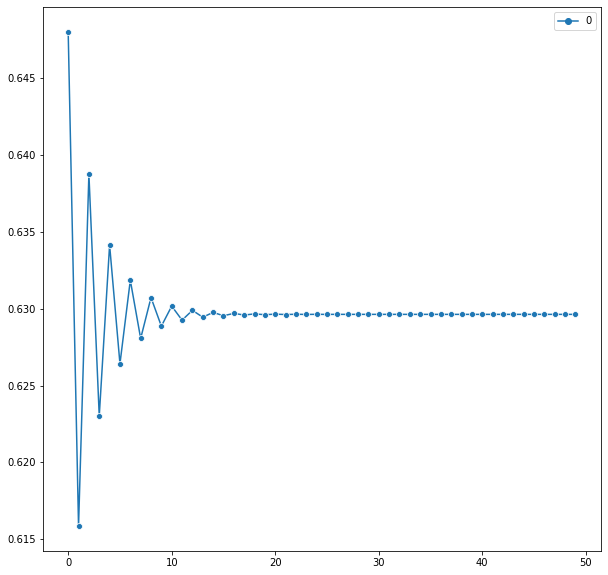

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))

t = xn.cpu().numpy()
temp = t.copy() # Deep copy - avoiding shared memory problem

sns.lineplot(markers=True,data=temp[0:max_iteration],err_style="bars")